### KNN model implementation


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
#print(os.listdir("../input"))

In [14]:
data = pd.read_csv("test_1.csv")
#data = data_orj.loc [1:10000,'Gender':'Purchase']  # data is sliced in order to study fast


In [15]:
data.head()


,Date,Statistics_Mean,Target
0,21-Apr-15,0.074401,0
1,14-Apr-15,0.085505,0
2,5-Apr-15,-0.155459,1
3,29-Mar-15,-0.111521,1
4,20-Mar-15,-0.053126,1


In [16]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
Date               200 non-null object
Statistics_Mean    200 non-null float64
Target             200 non-null int64
dtypes: float64(1), int64(1), object(1)
memory usage: 4.8+ KB


In [17]:
data.describe()


,Statistics_Mean,Target
count,200.000000,200.000000
mean,-0.031176,0.515000
std,0.134355,0.501029
min,-0.477279,0.000000
25%,-0.129458,0.000000
50%,0.004746,1.000000
75%,0.088475,1.000000
max,0.175258,1.000000


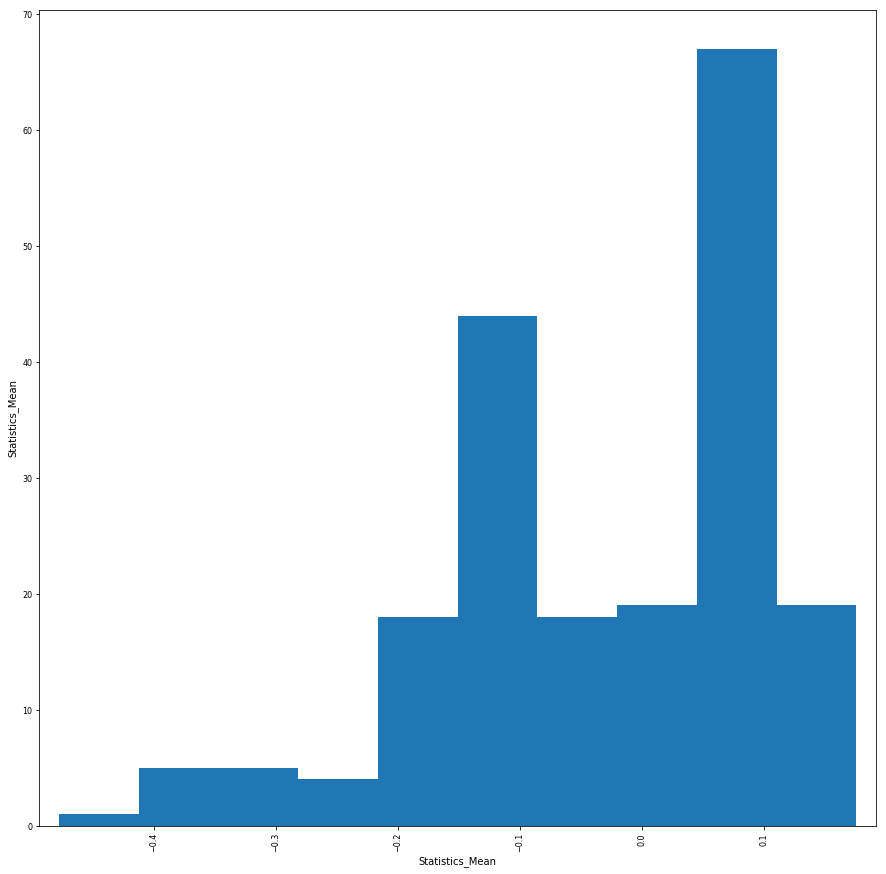

In [18]:
color_list = ['red' if i== 1 else 'green' for i in data.loc[:,'Target']]
pd.plotting.scatter_matrix(data.loc[:,data.columns != 'Target'],
                          c = color_list,
                          figsize = [15,15],
                          diagonal = 'hist',
                          alpha = 0.5, 
                          s = 100,
                          marker = '*')
plt.show()

1    103
0     97
Name: Target, dtype: int64

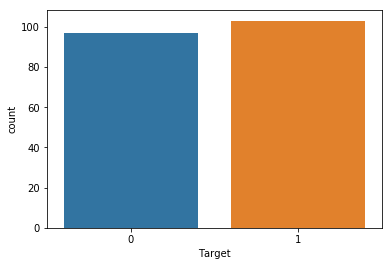

In [19]:
sns.countplot(x='Target', data=data)
data.loc[:,'Target'].value_counts()

In [24]:
data_knn = data[['Statistics_Mean','Target']]
data_knn.head()


,Statistics_Mean,Target
0,0.074401,0
1,0.085505,0
2,-0.155459,1
3,-0.111521,1
4,-0.053126,1


In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
knn = KNeighborsClassifier(n_neighbors = 3)
x,y = data_knn.loc[:,data_knn.columns != 'Target'], data_knn.loc[:,'Target']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state = 42)
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)
#print('Prediction : {}'.format(prediction))
print('With KNN (K=3) accuracy is: ', knn.score(x_test,y_test))

With KNN (K=3) accuracy is:  0.95
